# DSCI 503 - Homework 07
### Matt Snyder

## Problem 1: NYC Restaurants Dataset

In [1]:
# Import numpy, pandas, and matplotlib.pyplot using the standard aliases. Import LinearRegression,
# LogisticRegression, and train_test_split from sklearn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Load the data stored in the tab-delimited file nyc.txt into a DataFrame named nyc. 
nyc = pd.read_table('nyc.txt')

# Use head() to display the first 10 rows of this DataFrame.
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
# Create a 2D feature array named X1 containing the relevant features, as well as a 1D label array named y1 containing the labels. 
X1 = nyc.iloc[:,1:].values
y1 = nyc.iloc[:,0].values

# Use train_test_split() to split the data into training and testing sets using an 80/20 split. Name the
# resulting arrays X_train_1, X_test_1, y_train_1, and y_test_1. Set random state=1.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state=1)

# Print the shapes of X_train_1 and X_test_1. Include text labeling the two results as shown below
print(f'Training Features Shape: {X_train_1.shape}')
print(f'Test Features Shape:     {X_test_1.shape}')

Training Features Shape: (134, 5)
Test Features Shape:     (34, 5)


In [4]:
# Create a linear regression model named nyc_mod and then fit it to the training data. 
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

# Display the intercepts and coefficients for the final model with text labels as shown below. 
print (f'Intercept:    {nyc_mod.intercept_}')
print (f'Coefficients: {nyc_mod.coef_}')

Intercept:    -23.755435322488907
Coefficients: [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [5]:
# Calculate and print the training and testing r-squared values for your model, rounded to four decimal places. 
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)
print (f'Training r-Squared: {round(train_r2, 4)}')
print (f'Testing r-Squared:  {round(test_r2, 4)}')

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [6]:
# Use your model to generate price estimates based on the feature values in the test set. Store the results in a variable named test_pred_1.
test_pred_1 = nyc_mod.predict(X_test_1)

# Print the first 10 observed y-values for the test set, and then the first 10 predictions, rounded to 2 decimal places. 
np.set_printoptions(precision=2, floatmode='fixed') # fixed display of 2 decimal places, appropriate for prices
print (f'Observed Prices:  {np.round(np.float64(y_test_1[:10]),2)}') # convert prices to float so values will line up vertically
print (f'Estimated Prices: {np.round(test_pred_1[:10],2)}')
np.set_printoptions(precision=8, floatmode='maxprec_equal') # restore defaults 

Observed Prices:  [33.00 45.00 54.00 38.00 22.00 47.00 38.00 51.00 46.00 47.00]
Estimated Prices: [39.20 38.09 49.35 39.26 19.72 47.40 36.85 50.07 48.26 43.01]


In [7]:
# Create a DataFrame named nyc_new that contains the feature values for these 3 restaurants. 
column_names = ['Food', 'Decor', 'Service', 'Wait', 'East'] # same order as nyc.columns[1:]
nyc_new = pd.DataFrame([[22, 12, 20, 15, 0], [18, 19, 22, 34, 1], [25, 22, 18, 36, 0]], columns = column_names)

# Pass this DataFrame to the predict() method of your model, storing the results in a variable named new_pred_1. 
new_pred_1 = nyc_mod.predict(nyc_new.values)

# Print the price predictions stored in this variable, rounded to 2 decimal places
print (f'Estimated Prices: {np.round(new_pred_1,2)}')

Estimated Prices: [30.87 42.57 58.06]


## Problem 2: Diamonds Dataset

In [8]:
# Load the data stored in the tab-delimited file diamonds.txt into a DataFrame named diamonds. 
diamonds = pd.read_table('diamonds.txt')

# Use head() to display the first 5 rows of this DataFrame.
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Add two new columns to diamonds. The new columns should be named ln_carat and ln_price, and should contain the natural logarithms of the carat and price columns. 
diamonds.loc[:, 'ln_carat'] = np.log(diamonds.carat)
diamonds.loc[:, 'ln_price'] = np.log(diamonds.price)

# Use head() to display the first 5 rows of diamonds.
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


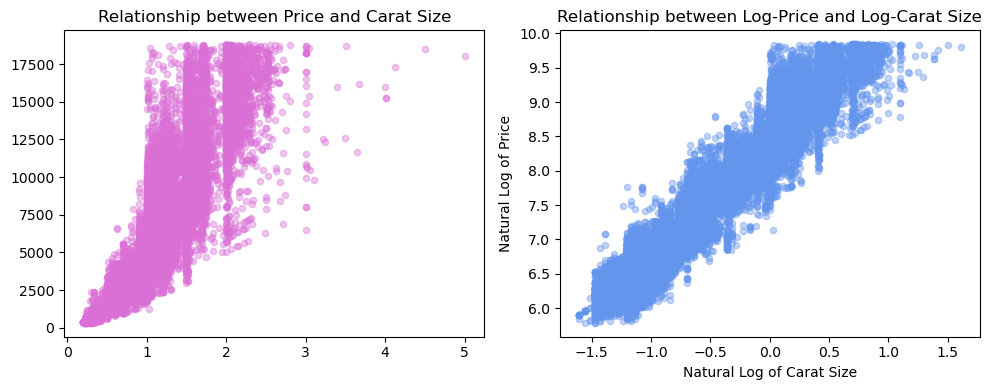

In [10]:
# Set a figure size of [10,4].
plt.figure(figsize=[10,4])

# Create two side-by-side scatterplots. The first scatter plot should display the relationship between carat and price, 
plt.subplot(1,2,1)

# Set the point size to 20, and the alpha level to 0.2. Do not include a border on the points.
plt.scatter(x=diamonds.carat, y=diamonds.price, s=20, alpha=0.4, color='orchid')

# The plots should be titled "Relationship between Price and Carat Size" 
plt.title('Relationship between Price and Carat Size')

# the second scatterplot should display the relationship between the transformed variables. 
plt.subplot(1,2,2)
plt.scatter(x=diamonds.ln_carat, y=diamonds.ln_price, s=20, alpha=0.4, color='cornflowerblue')

# and "Relationship between Log-Price and Log-Carat Size".
plt.title('Relationship between Log-Price and Log-Carat Size')

# The axes should be labeled "Carat Size", "Price", 
plt.xlabel('Carat Size')
plt.ylabel('Price')

# "Natural Log of Carat Size", and "Natural Log of Price".
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')

# Call plt.tight_layout() and then use plt.show() to display the figure.
plt.tight_layout()
plt.show()

In [11]:
# Create a 2D feature array named X2 containing the relevant feature, as well as a 1D label array named y2 containing the labels. 
X2 = diamonds.loc[:, 'ln_carat'].values
y2 = diamonds.loc[:, 'ln_price'].values

# Use train_test_split() to split the data into training and testing sets using an 90/10 split. Name the
# resulting arrays X_train_2, X_test_2, y_train_2, and y_test_2. Set random state=1.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1, random_state=1)
X_train_2 = X_train_2.reshape(-1, 1)
X_test_2 = X_test_2.reshape(-1, 1)

# Print the shapes of X_train_2 and X_test_2. Include text labeling the two results as shown below. 
print (f'Training Features Shape: {X_train_2.shape}')
print (f'Test Features Shape: {X_test_2.shape}')

Training Features Shape: (48546, 1)
Test Features Shape: (5394, 1)


In [12]:
# Create a linear regression model named dia_mod and then fit it to the training data. 
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)

# Display the intercepts and coefficients for the final model with text labels as shown below. 
print (f'Intercept:    {dia_mod.intercept_}')
print (f'Coefficients: {dia_mod.coef_}')

Intercept:    8.44829862117915
Coefficients: [1.67493107]


In [13]:
# Calculate and print the training and testing r-squared values for your model, rounded to four decimal places. 
train_r2 = dia_mod.score(X_train_2, y_train_2)
test_r2 = dia_mod.score(X_test_2, y_test_2)
print (f'Training r-Squared: {round(train_r2, 4)}')
print (f'Testing r-Squared:  {round(test_r2, 4)}')

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [14]:
# Use your model to generate estimates for the natural log of prices for diamonds in the test set. Store the results in a variable named test_pred_2. 
test_pred_2 = dia_mod.predict(X_test_2)

# Print the first 10 observed prices for the test set, and then the first 10 estimated prices, rounded to the nearest whole number. 
np.set_printoptions(precision=0, floatmode='fixed') # don't display decimal
print (f'Observed Prices:  {np.round(np.exp(y_test_2))[0:10]}') # convert ln(price) to price with exp
print (f'Estimated Prices: {np.round(np.exp(test_pred_2))[0:10]}')
np.set_printoptions(precision=8, floatmode='maxprec_equal') # restore defaults 

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 729. 6334. 2096.  766. 6334. 1612. 5309. 1048. 9204.  804.]


In [15]:
# Create a 2D column array named diamonds_new to store the natural logarithm of the carat sizes show above. 
diamonds_carat_new = np.array([[0.5], [1.0], [1.5], [2.0], [2.5], [3.0]])
diamonds_new = np.log(diamonds_carat_new)

# Pass this array to the predict() method of your model, storing the results in a variable named new_pred_2. 
new_pred_2 = dia_mod.predict(diamonds_new)

# Print the predicted prices for diamonds with these carat sizes, rounded to the nearest dollar. 
print (f'Estimated Prices: {np.round(np.exp(new_pred_2))}') # convert ln(price) to price with exp

Estimated Prices: [ 1462.  4667.  9204. 14902. 21656. 29390.]


## Problem 3: Heart Disease Dataset

In [16]:
# Load the data stored in the tab-delimited file heart_disease.txt into a DataFrame named hd. 
hd = pd.read_table('heart_disease.txt')

# Use head() to display the first 10 rows of this DataFrame.
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [17]:
# Create a 2D feature array named X3 containing the relevant features, as well as a 1D label array named y3 containing the labels. 
X3 = hd.iloc[:, :-1].values
y3 = hd.iloc[:, -1].values

# Use train_test_split() to split the data into training and testing sets using an 80/20 split. Name the
# resulting arrays X_train_3, X_test_3, y_train_3, and y_test_3. Set random state=1. Use stratified sampling.
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.2, random_state=1, stratify=y3)

# Print the shapes of X_train_3 and X_test_3. Include text labeling the two results as shown below. 
print (f'Training Features Shape: {X_train_3.shape}')
print (f'Test Features Shape:     {X_test_3.shape}')

Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)


In [18]:
# Create a logistic regression model named hd_mod with solver='lbfgs' and penalty='none'. Then fit the model to the training data. 
# If you get a warning message stating that the model failed to converge, then increase the max_iter parameter until it does converge.
hd_mod = LogisticRegression(solver='lbfgs', penalty=None, max_iter=5000) # default max_iter = 100
hd_mod.fit(X_train_3, y_train_3)

# Display the intercepts and coefficients for the final model with text labels as shown below. Note that the coefficients
# array will not fit on a single line, so please display it BENEATH the line containing the "Coefficients:" label.
print (f'Intercept: {hd_mod.intercept_}')
print ('Coefficients:')
print (hd_mod.coef_)

Intercept: [-9.82698876]
Coefficients:
[[-0.03366400  1.80744898  0.75266514  0.02512371  0.01438384 -0.69787325
   0.32407839 -0.01962910  0.73250130  0.36597871  0.28222476  1.07574189
   0.38328196]]


In [19]:
# Calculate and print the training and testing accuracy scores for your model, rounded to four decimal places. 
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)
print(f'Training Accuracy: {round(train_acc,4)}')
print(f'Testing Accuracy:  {round(test_acc,4)}')

Training Accuracy: 0.8472
Testing Accuracy:  0.8148


In [20]:
# Use your model to generate label predictions for observations in the test set. Store the results in a variable named test_pred_3. 
test_pred_3 = hd_mod.predict(X_test_3)

# Print the first 20 observed labels for the test set, and then the first 20 predicted labels. 
print (f'Observed Labels:  {y_test_3[0:20]}')
print (f'Predicted Labels: {test_pred_3[0:20]}')

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [21]:
# Use the predict_proba() method of your model to estimate probabilities of being in each of the two classes for each
# individual in the test set. This function returns a 2D array. 
pred_probs = hd_mod.predict_proba(X_test_3)

# Display the predicted probabilities for the first 10 observations
# in the test set as a DataFrame with the columns named according to the labels that they represent (1 and 2).
pred_probs_df = pd.DataFrame(pred_probs, columns = hd_mod.classes_)
pred_probs_df.head(10)

,1,2
0,0.011690,0.988310
1,0.043234,0.956766
2,0.039975,0.960025
3,0.847691,0.152309
4,0.874048,0.125952
5,0.052031,0.947969
6,0.920274,0.079726
7,0.945006,0.054994
8,0.009954,0.990046
9,0.996717,0.003283


## Problem 4: Gapminder Dataset

In [22]:
# Load the data stored in the tab-delimited file gapminder_data.txt into a DataFrame named gm. 
gm = pd.read_table('gapminder_data.txt')

# Filter the DataFrame, keeping only the 2018 results, storing the results in a DataFrame named gm18. 
sel = gm.loc[:,'year'] == 2018
gm18 = gm.loc[sel, :]

# Use head() to display the first 10 rows of this DataFrame.
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [23]:
# Create a 2D feature array named X4 containing the relevant features, as well as a 1D label array named y4 containing the labels.
X4 = gm18.loc[:, ['life_exp', 'gdp_per_cap', 'gini']].values
y4 = gm18.loc[:, 'continent'].values

# Use train_test_split() to split the data into training and testing sets using an 70/30 split. Name the
# resulting arrays X_train_4, X_test_4, y_train_4, and y_test_4. Set random state=1. Use stratified sampling.
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size = 0.3, random_state=1, stratify=y4)

# Print the shapes of X_train_4 and X_test_4.
print (f'Training Features Shape: {X_train_4.shape}')
print (f'Test Features Shape:     {X_test_4.shape}')

Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


In [24]:
# Create a logistic regression model named gm_mod with the following parameters: solver='lbfgs', penalty='none', and multi_class='multinomial'. 
gm_mod = LogisticRegression(solver='lbfgs', penalty=None, max_iter=15000) # default is multi_class='multinomial'

# Then fit the model to the training data. 
gm_mod.fit(X_train_4, y_train_4)

# Display the intercepts and coefficients for the final model with text labels as shown below. 
print (f'Intercept: {gm_mod.intercept_}')
print ('Coefficients:')
print (gm_mod.coef_)

Intercept: [ 19.75247898 -28.36453132  16.38563582  -7.77359233]
Coefficients:
[[-3.19073322e-01 -1.43494945e-05  1.06166033e-01]
 [ 2.44088795e-01 -2.75425414e-05  2.72748585e-01]
 [-1.80211508e-01  3.46604622e-05 -6.64231900e-02]
 [ 2.55195712e-01  7.23187221e-06 -3.12491317e-01]]


In [25]:
# Use your model to generate label predictions for observations in the test set. Store the results in a variable named test_pred_4. 
test_pred_4 = gm_mod.predict(X_test_4)

# Print the first 8 observed labels for the test set, and then the first 8 predicted labels. 
print (f'Observed Labels:  {y_test_4[:8]}')
print (f'Predicted Labels: {test_pred_4[:8]}')

Observed Labels:  ['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe']
Predicted Labels: ['americas' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


In [26]:
# Use the predict_proba() method of your model to estimate probabilities of being in each of the four classes for each
# individual in the test set. This function returns a 2D array. 
pred_probs = gm_mod.predict_proba(X_test_4)

# Display the predicted probabilities for the first 10 observations in the test set as a DataFrame with the columns named according to the associated labels: 'africa', 'americas', 'asia', and 'europe'.
pred_probs_df = pd.DataFrame(pred_probs, columns = gm_mod.classes_)
pred_probs_df.head(10)

,africa,americas,asia,europe
0,0.067030,0.480951,0.310947,0.141072
1,0.002980,0.080790,0.124890,0.791340
2,0.813706,0.000105,0.186105,0.000084
3,0.312024,0.081517,0.562637,0.043822
4,0.002411,0.002859,0.069305,0.925426
5,0.012941,0.006663,0.331887,0.648509
6,0.720690,0.008621,0.269554,0.001135
7,0.000112,0.000444,0.017037,0.982407
8,0.008359,0.002536,0.245454,0.743651
9,0.129198,0.112070,0.456627,0.302106


In [27]:
# Create a DataFrame named gm_new that contains the information shown in the table above. 
column_names = ['life_exp', 'gdp_per_cap', 'gini']
gm_new = pd.DataFrame([[75,5000,30],[75,5000,40],[75,5000,50],[75,20000,30],[75,20000,40],[75,20000,50]], columns=column_names)

# Pass this DataFrame to the predict_proba() method of your model. Round the estimated probabilities to 3 decimal places,
pred_prob_new = gm_mod.predict_proba(gm_new.values)
pred_prob_new = np.round(pred_prob_new, 3)

# display the results in the form of a DataFrame. The title of the columns in the DataFrame should be the same as the set of possible labels: 'africa', 'americas', 'asia', and 'europe'.
pred_probs_new_df = pd.DataFrame(pred_prob_new, columns = gm_mod.classes_)
pred_probs_new_df.head(10)

,africa,americas,asia,europe
0,0.032,0.012,0.261,0.695
1,0.206,0.422,0.304,0.069
2,0.083,0.895,0.022,0.000
3,0.020,0.006,0.352,0.621
4,0.161,0.270,0.495,0.074
5,0.096,0.851,0.052,0.001


According to our model:
* Country 0 is most likely in Europe
* Country 1 is most likely in Americas
* Country 2 is most likely in Americas
* Country 3 is most likely in Europe
* Country 4 is most likely in Asia
* Country 5 is most likely in Americas